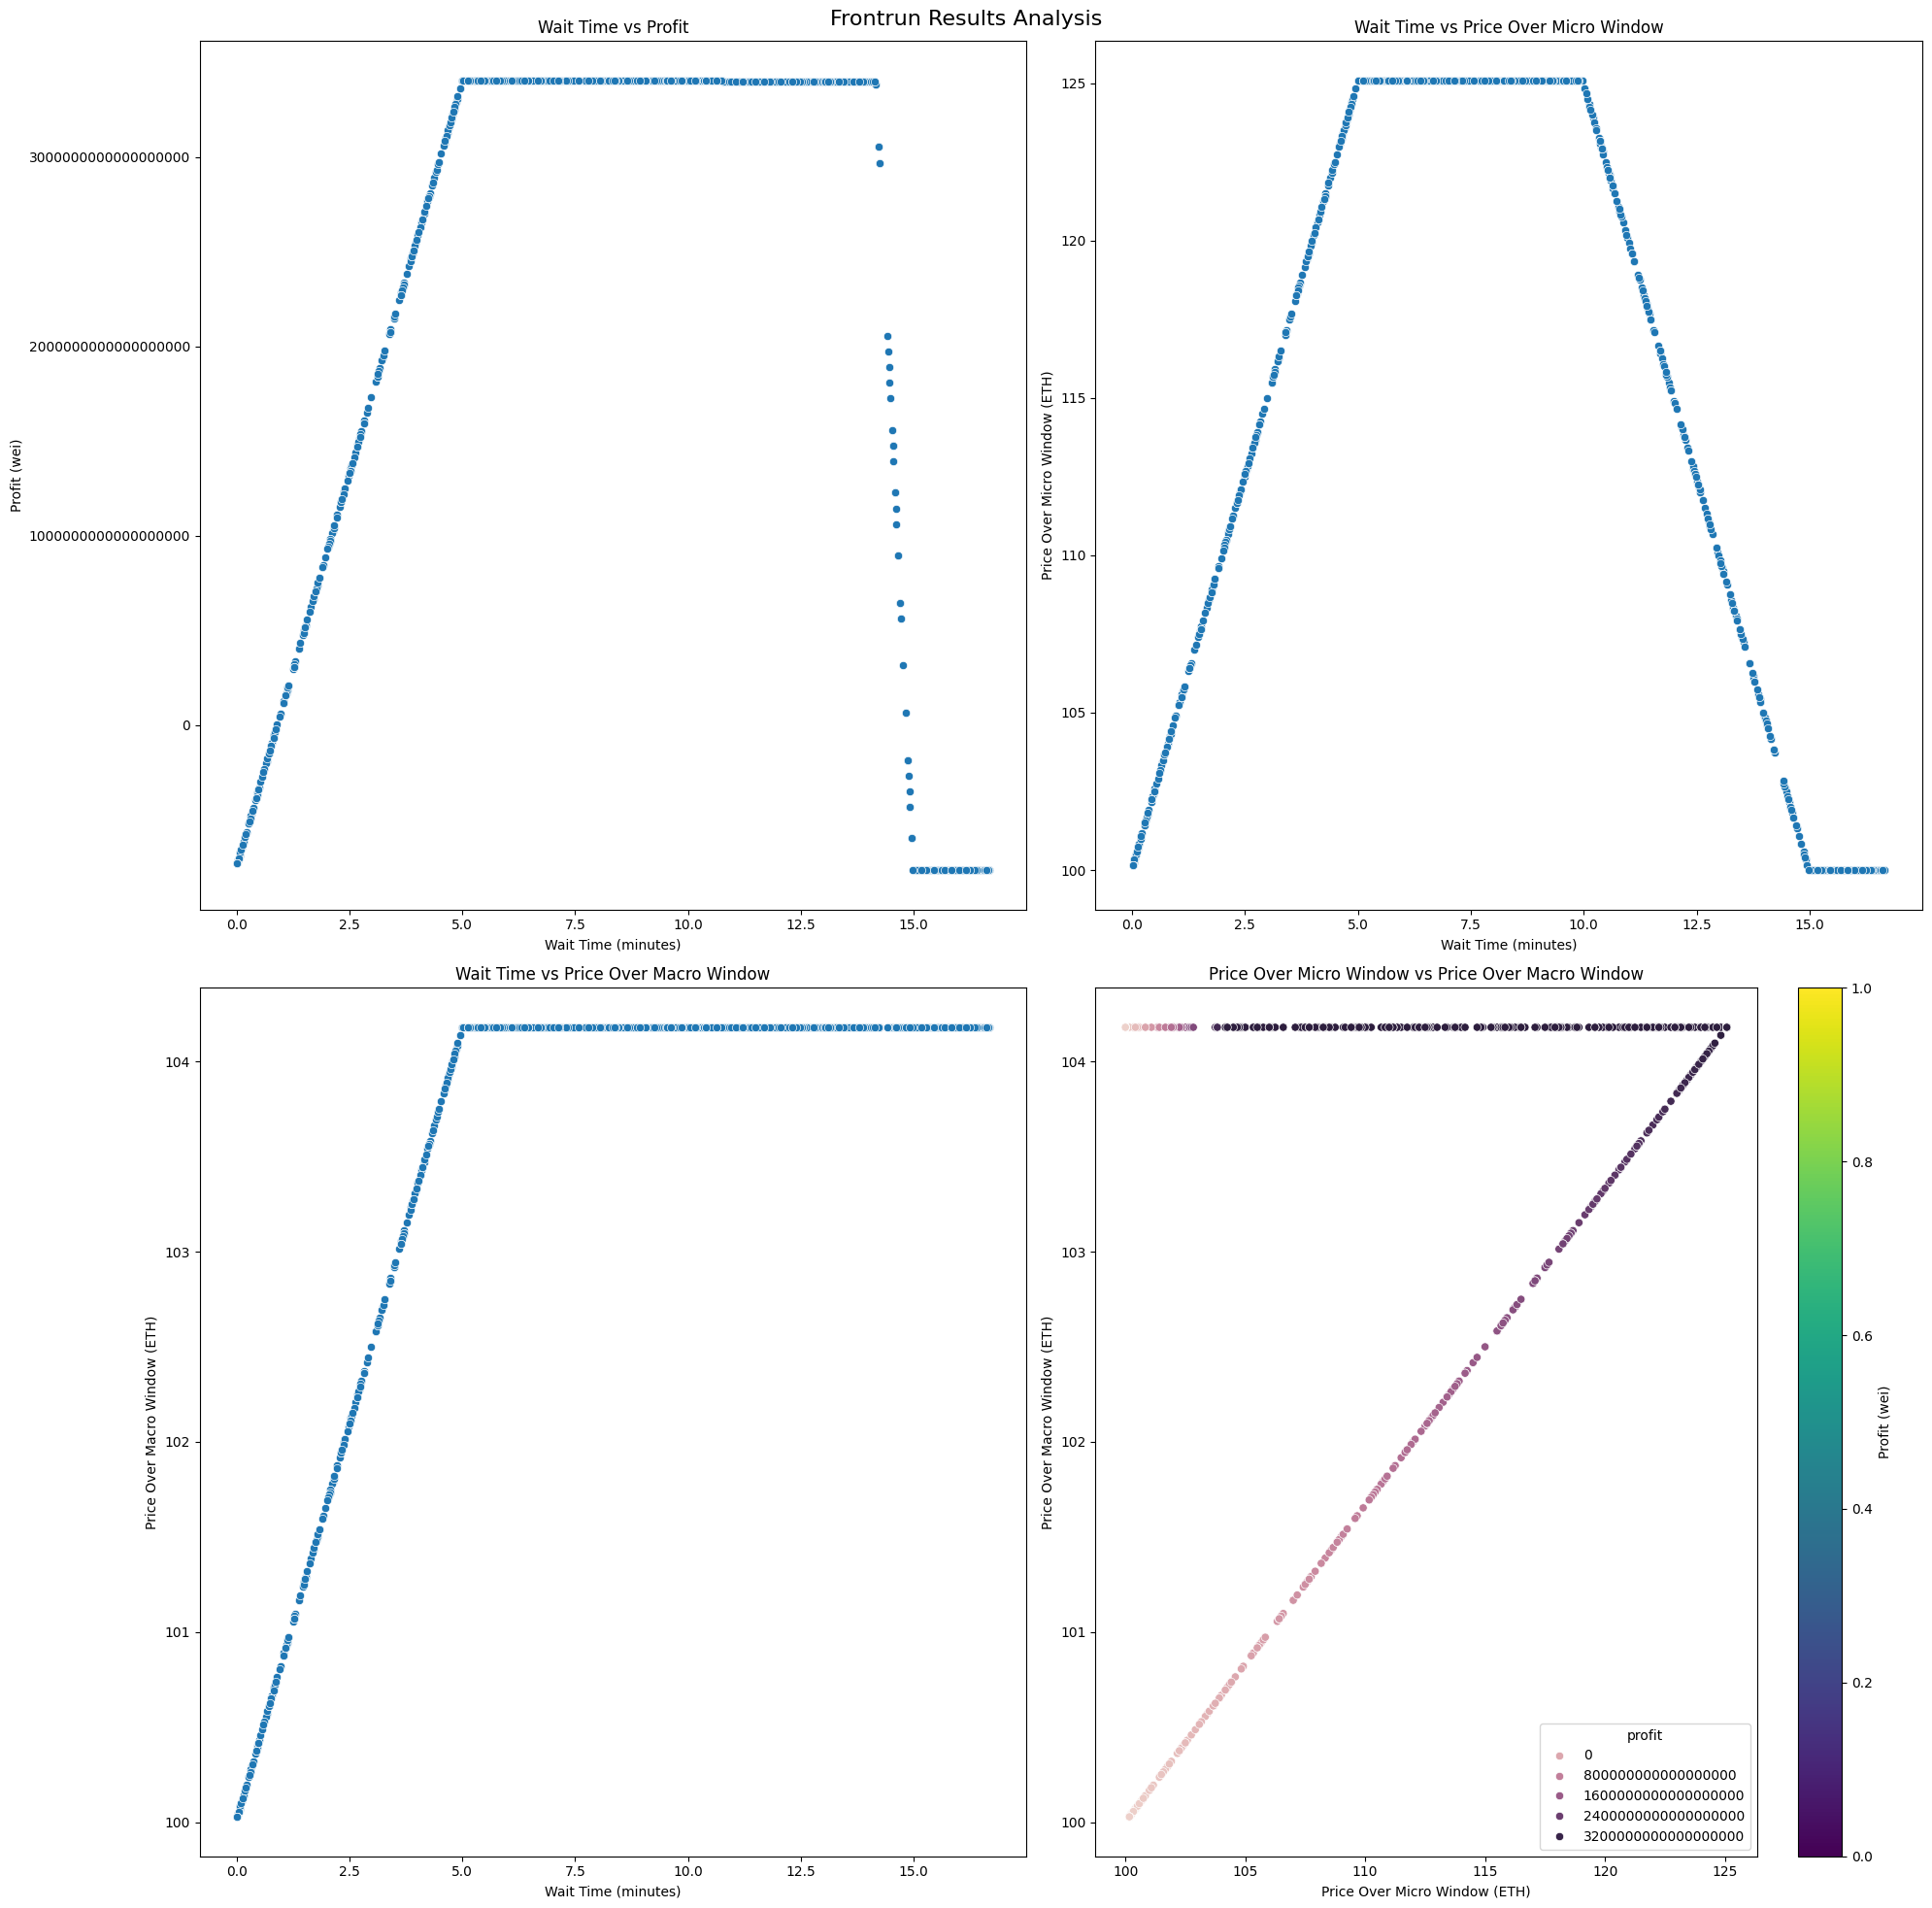

       waitTimeToUnwind        profit  priceOverMicroWindow  \
count       1001.000000  1.001000e+03           1001.000000   
mean         491.210789  1.949308e+18            113.568765   
std          316.055031  1.727146e+18              9.960665   
min            1.000000 -7.665917e+17            100.000000   
25%          220.000000  5.827433e+16            102.750000   
50%          485.000000  3.224283e+18            113.916667   
75%          776.000000  3.401989e+18            125.083333   
max         1000.000000  3.404009e+18            125.083333   

       priceOverMacroWindow  waitTimeMinutes  
count           1001.000000      1001.000000  
mean             103.388861         8.186846  
std                1.361393         5.267584  
min              100.027778         0.016667  
25%              103.069444         3.666667  
50%              104.180556         8.083333  
75%              104.180556        12.933333  
max              104.180556        16.666667  

Maximum 

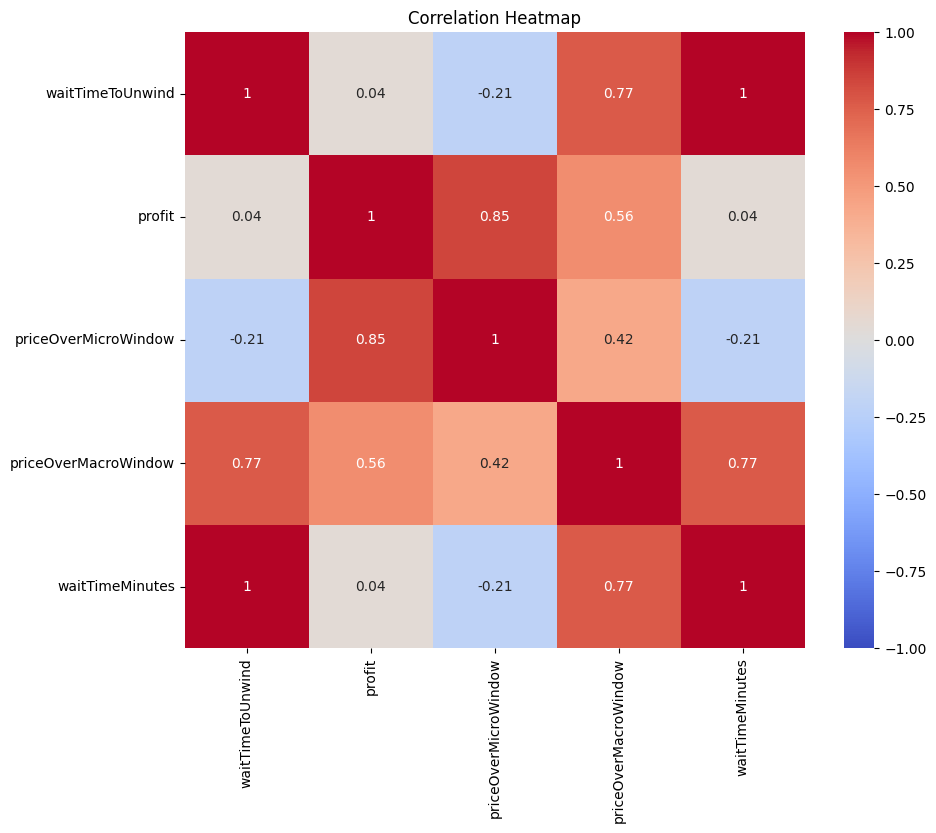

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Read the CSV file
df = pd.read_csv('frontrun_results.csv')

# Convert waitTimeToUnwind to minutes for better readability
df['waitTimeMinutes'] = df['waitTimeToUnwind'] / 60

# Function to convert string to float, handling potential formatting issues
def to_float(x):
    if isinstance(x, str):
        return float(x.replace(',', ''))
    return float(x)

# Convert price columns from wei to ETH, ensuring all values are numeric
for col in ['priceOverMicroWindow', 'priceOverMacroWindow']:
    df[col] = df[col].apply(to_float) / 1e18

# Convert profit to numeric if it's not already
df['profit'] = df['profit'].apply(to_float)

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(20, 20))
fig.suptitle('Frontrun Results Analysis', fontsize=16)

# Plot 1: Wait Time vs Profit
sns.scatterplot(x='waitTimeMinutes', y='profit', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Wait Time vs Profit')
axs[0, 0].set_xlabel('Wait Time (minutes)')
axs[0, 0].set_ylabel('Profit (wei)')
axs[0, 0].ticklabel_format(style='plain', axis='y')

# Plot 2: Wait Time vs Price Over Micro Window
sns.scatterplot(x='waitTimeMinutes', y='priceOverMicroWindow', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Wait Time vs Price Over Micro Window')
axs[0, 1].set_xlabel('Wait Time (minutes)')
axs[0, 1].set_ylabel('Price Over Micro Window (ETH)')

# Plot 3: Wait Time vs Price Over Macro Window
sns.scatterplot(x='waitTimeMinutes', y='priceOverMacroWindow', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Wait Time vs Price Over Macro Window')
axs[1, 0].set_xlabel('Wait Time (minutes)')
axs[1, 0].set_ylabel('Price Over Macro Window (ETH)')

# Plot 4: Price Over Micro Window vs Price Over Macro Window
scatter = sns.scatterplot(x='priceOverMicroWindow', y='priceOverMacroWindow', hue='profit', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Price Over Micro Window vs Price Over Macro Window')
axs[1, 1].set_xlabel('Price Over Micro Window (ETH)')
axs[1, 1].set_ylabel('Price Over Macro Window (ETH)')

# Adjust color bar
plt.colorbar(scatter.collections[0], ax=axs[1, 1], label='Profit (wei)')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print some basic statistics
print(df.describe())

# Find the wait time that resulted in the maximum profit
max_profit_row = df.loc[df['profit'].idxmax()]
print(f"\nMaximum profit of {max_profit_row['profit']:.2f} wei was achieved with a wait time of {max_profit_row['waitTimeToUnwind']} seconds ({max_profit_row['waitTimeMinutes']:.2f} minutes).")

# Calculate correlations
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap')
plt.show()